In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df = pd.read_excel("Height-Weight Data.xlsx")

# Visualization

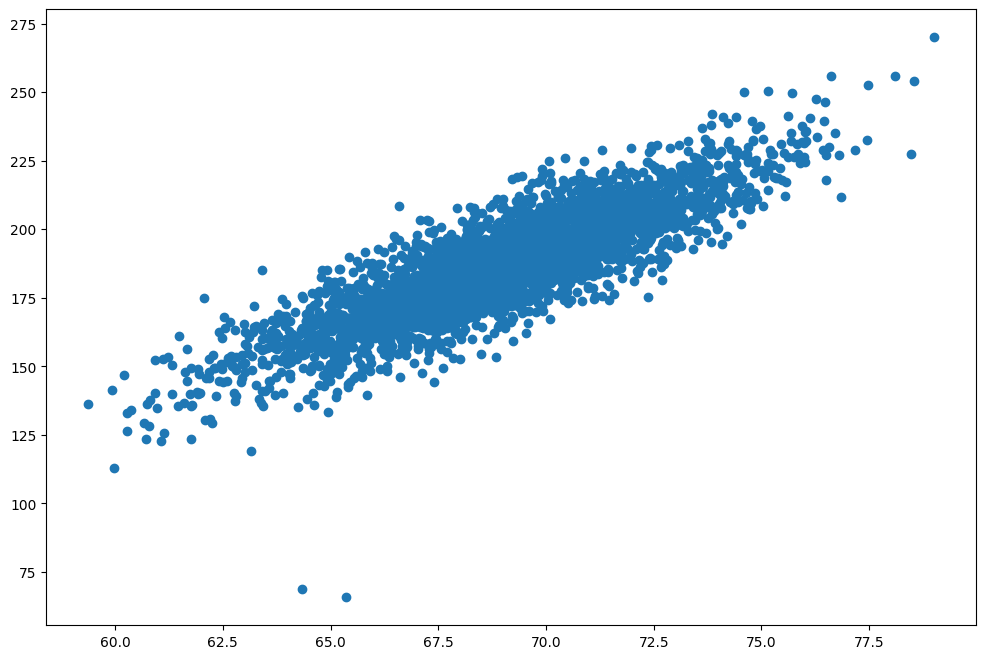

In [28]:
plt.figure(figsize=(12,8)) 
plt.scatter(df.Height,df.Weight)

Text(0.5, 1.0, 'Weight Plot')

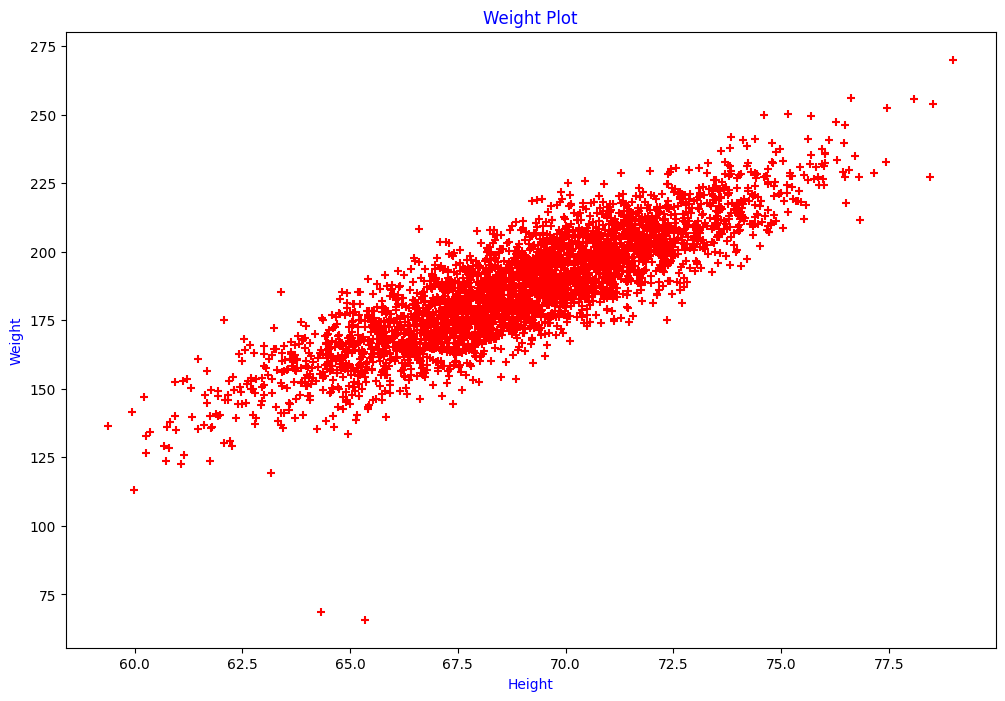

In [31]:
plt.figure(figsize=(12,8))
plt.scatter(df.Height,df.Weight,marker="+",color="red")
plt.xlabel("Height",color="blue")
plt.ylabel("Weight",color="blue")
plt.title("Weight Plot",color="blue")


In [32]:
x=df[["Height"]]
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [33]:
y=df["Weight"]
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split as tts

In [36]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.3,random_state=45)

In [37]:
xtrain.head()

,Height
2257,69.346474
276,62.600248
1418,68.697461
1550,67.396020
2510,69.326189


In [38]:
xtest.head()

,Height
1971,67.671414
1750,74.604668
2564,70.171479
3114,71.954680
176,67.599424


In [39]:
ytrain.head()

2257    181.851584
276     151.720704
1418    178.015095
1550    180.659638
2510    177.363588
Name: Weight, dtype: float64

In [40]:
ytest.head()

1971    174.724534
1750    249.946283
2564    192.347836
3114    207.693089
176     177.766426
Name: Weight, dtype: float64

# Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
reg=LinearRegression()

In [43]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [44]:
reg.predict([[70]])

C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([192.7832937])

In [45]:
pred=reg.predict(xtest)
pred

array([179.04561662, 219.94889141, 193.79494594, ..., 172.81690626,
       196.7531826 , 194.4356857 ])

In [46]:
df["Predicted Result"]= reg.predict(x)

In [47]:
df.head()

,Height,Weight,Predicted Result
0,73.847017,241.893563,215.479070
1,68.781904,162.310473,185.597042
2,74.110105,212.740856,217.031180
3,71.730978,220.042470,202.995336
4,69.881796,206.349801,192.085939


In [48]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [49]:
mse = mean_squared_error(ytest,pred)

In [50]:
mse

114.34471379972088

In [51]:
mae = mean_absolute_error(ytest,pred)
mae

8.033241997174171

# Best Fit Line

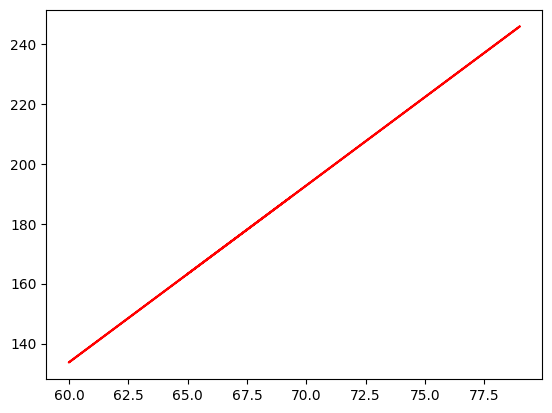

In [52]:
plt.plot(xtrain,reg.predict(xtrain),color="red")

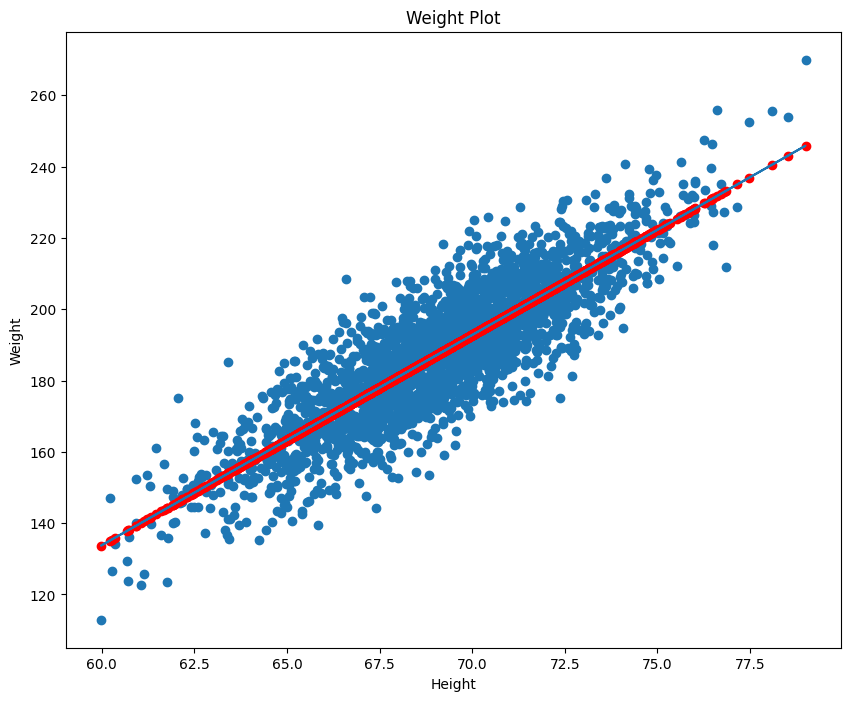

In [53]:
plt.figure(figsize=(10,8))
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Weight Plot")
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,reg.predict(xtrain))
plt.scatter(xtrain,reg.predict(xtrain),color="red")


In [54]:
from sklearn.metrics import r2_score
r2_score(ytest,pred)

0.7285757231751437

In [55]:
xtest.to_csv("Height-Weight Data.csv")

In [56]:
xtest.head()

,Height
1971,67.671414
1750,74.604668
2564,70.171479
3114,71.954680
176,67.599424


In [57]:
len(xtest)

1051

# Save Model

In [58]:
import pickle as pk
import joblib as jb

In [59]:
pk.dump(reg,open("1","wb"))

In [60]:
reg2 =pk.load(open("first","rb"))

In [62]:
reg2.predict([[1000]])

C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9787.7483496])

In [63]:
import warnings
warnings.filterwarnings("ignore")

In [64]:
jb.dump(reg,"2")

['2']